In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_decomposition import CCA

In [ ]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

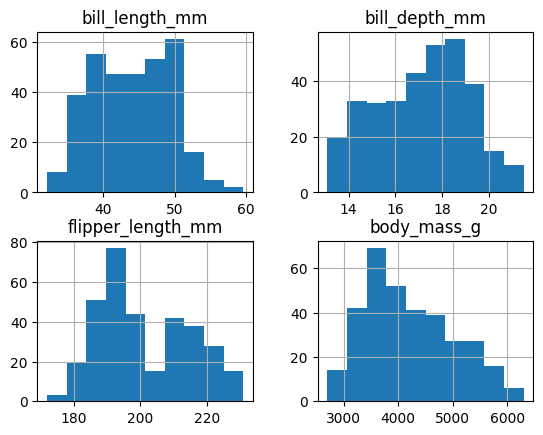

In [ ]:
df.hist()

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


Text(0.5, 1.0, 'Длина ~ толщина клюва')

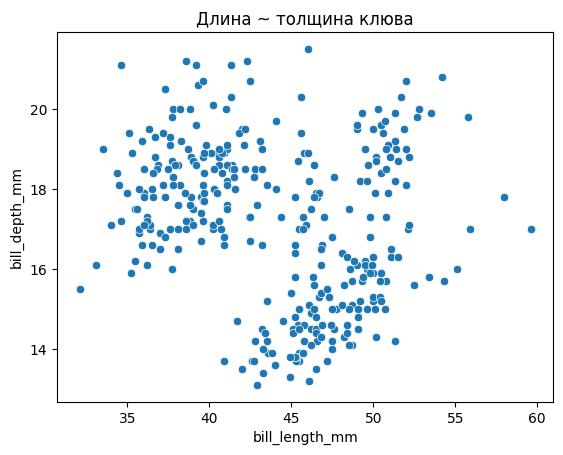

In [ ]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm', data=df)
plt.title('Длина ~ толщина клюва')

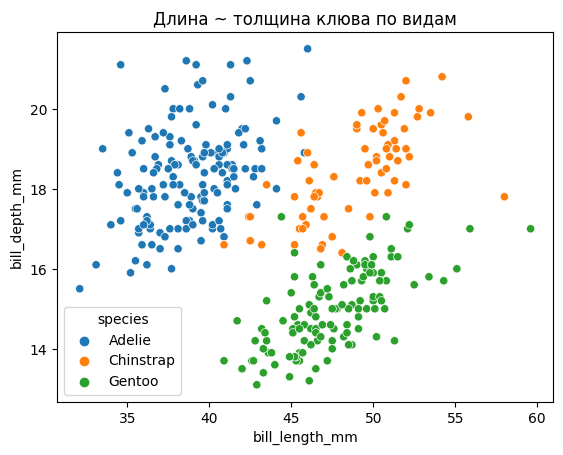

In [ ]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm', hue="species",data=df)
plt.title('Длина ~ толщина клюва по видам')
plt.show()

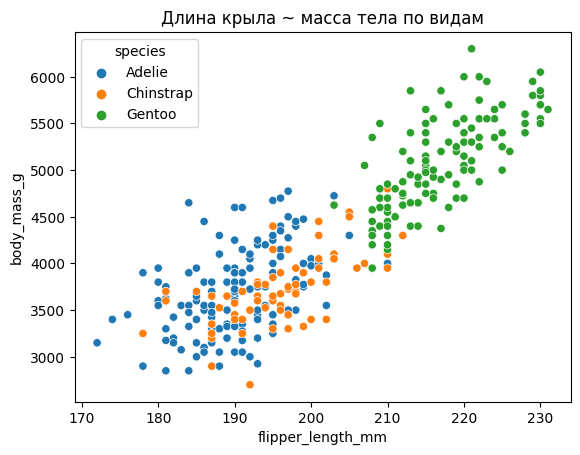

In [ ]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species',data =df)
plt.title('Длина крыла ~ масса тела по видам')
plt.show()

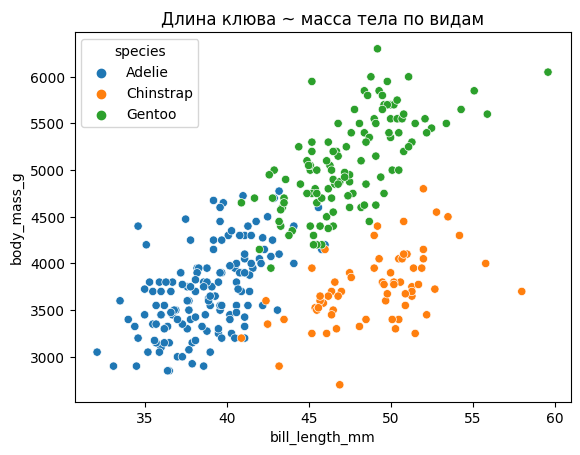

In [ ]:
sns.scatterplot(x='bill_length_mm', y='body_mass_g',hue='species',data =df)
plt.title('Длина клюва ~ масса тела по видам')
plt.show()

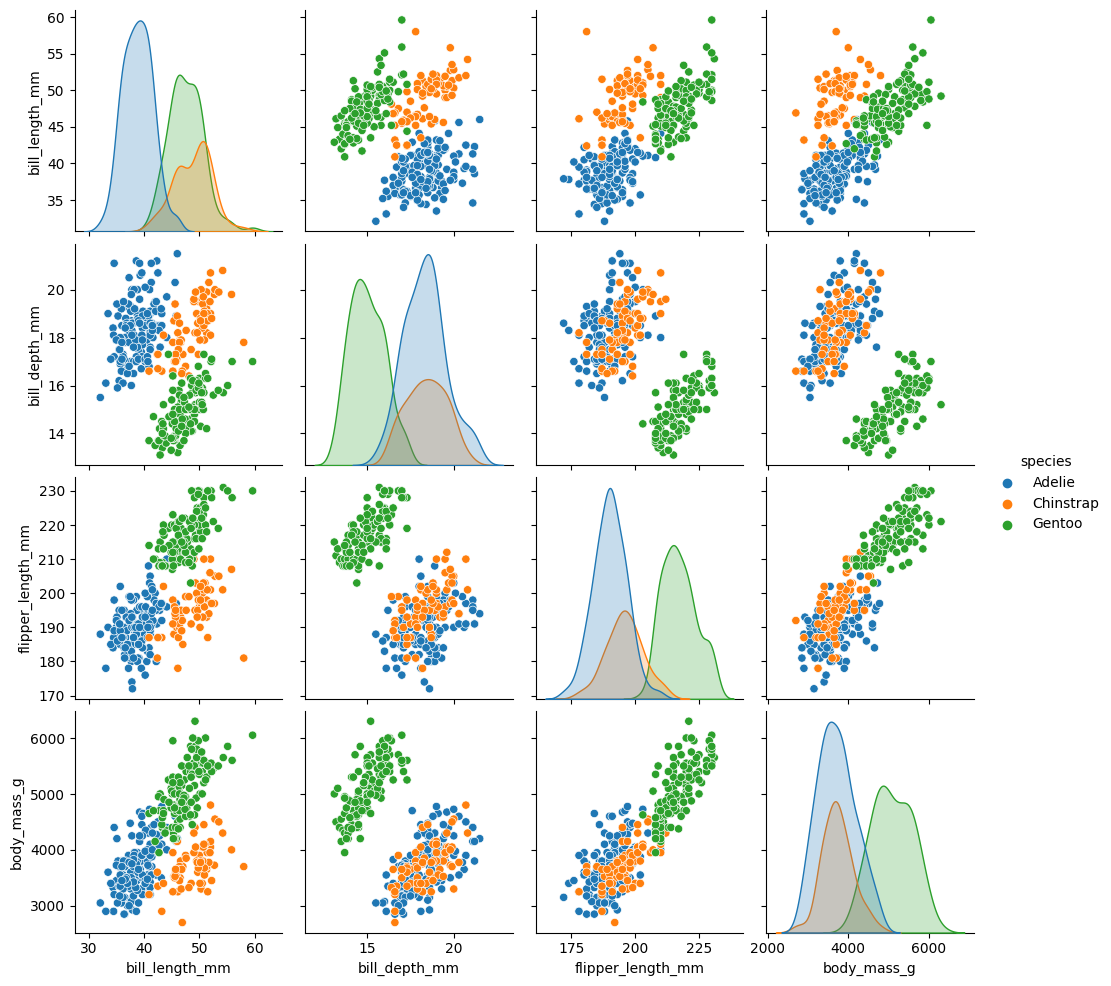

In [ ]:
sns.pairplot(data=df,hue='species')

Зачем был написан код еще выше, если можно было обойтись одной строкой? Вопрос ответа не требует.

In [ ]:
X = df[['bill_length_mm','bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [ ]:
X_mc = (X-X.mean())/(X.std())
X_mc.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [ ]:
Y = df[['flipper_length_mm','body_mass_g']]
Y.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


In [ ]:
Y_mc = (Y-Y.mean())/(Y.std())

In [ ]:
from sklearn.cross_decomposition import CCA

In [ ]:
cca = CCA()
cca.fit(X_mc, Y_mc)
X_c, Y_c = cca.transform(X_mc, Y_mc)

In [ ]:
cca.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 0.80778876,  1.34803699],
       [-0.63191572,  0.18340716]])

In [ ]:
cc_res = pd.DataFrame({'CCX_1':X_c[:, 0],
                       'CCY_1':Y_c[:, 0],
                       'CCX_2':X_c[:, 1],
                       'CCY_2':Y_c[:, 1],
                       'Species':df.species.tolist(),
                       'Island':df.island.tolist(),
                       'sex':df.sex.tolist()})
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Species,Island,sex
0,-1.186252,-1.408795,-0.010367,0.682866,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-0.456036,0.429879,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,-0.130809,-0.839620,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,-0.073623,-0.458571,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,0.736248,-0.014204,Adelie,Torgersen,MALE


In [ ]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

Text(0.5, 1.0, 'CCX1 ~ CCY1, corr = 0.79')

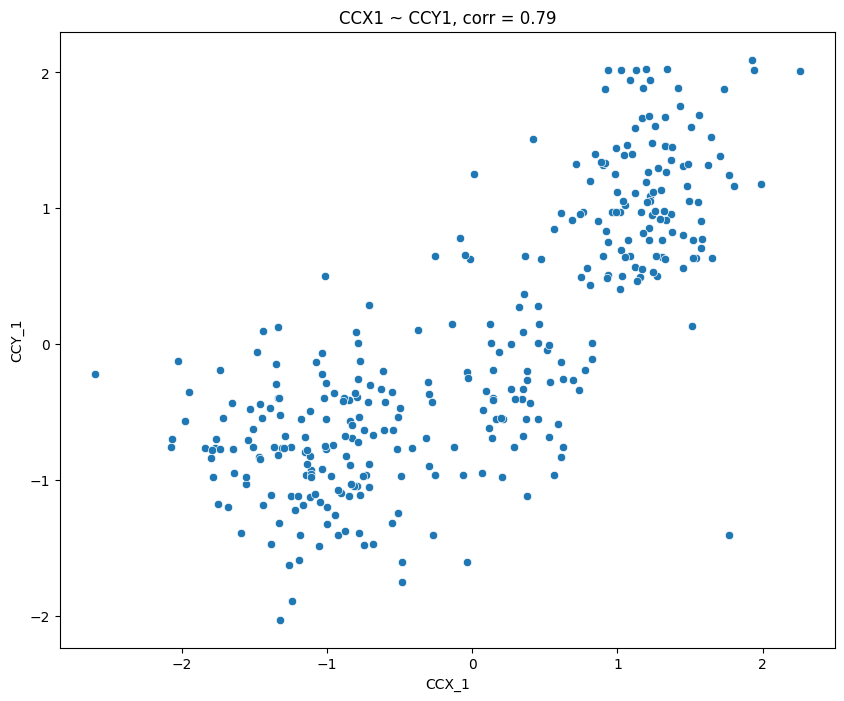

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CCX_1', y='CCY_1', data=cc_res)
plt.title('CCX1 ~ CCY1, corr = %.2f' % np.corrcoef(X_c[:, 0], Y_c[:, 0])[0 ,1])

Text(0.5, 1.0, 'CCY_1 по видам')

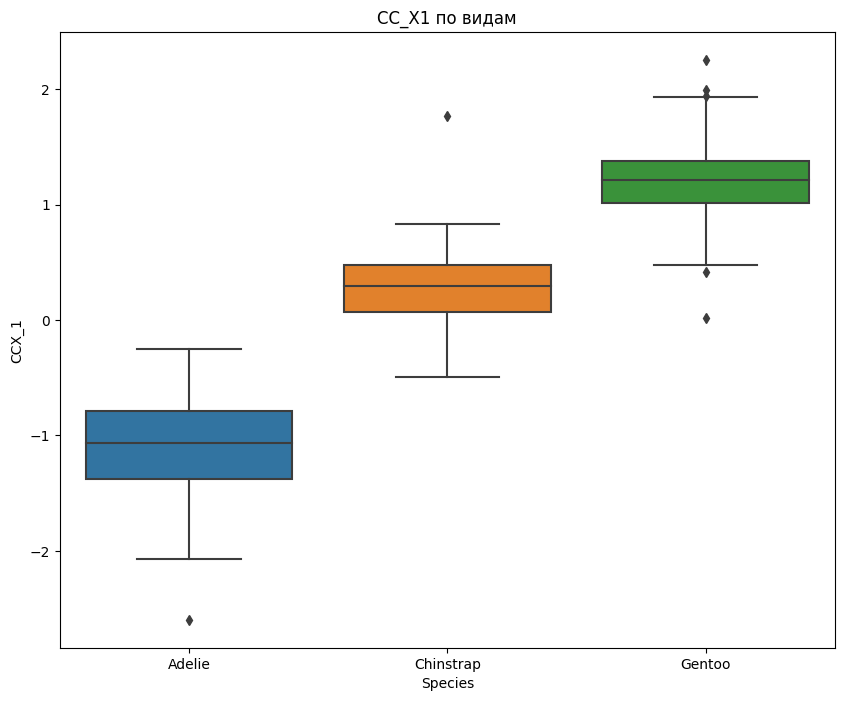

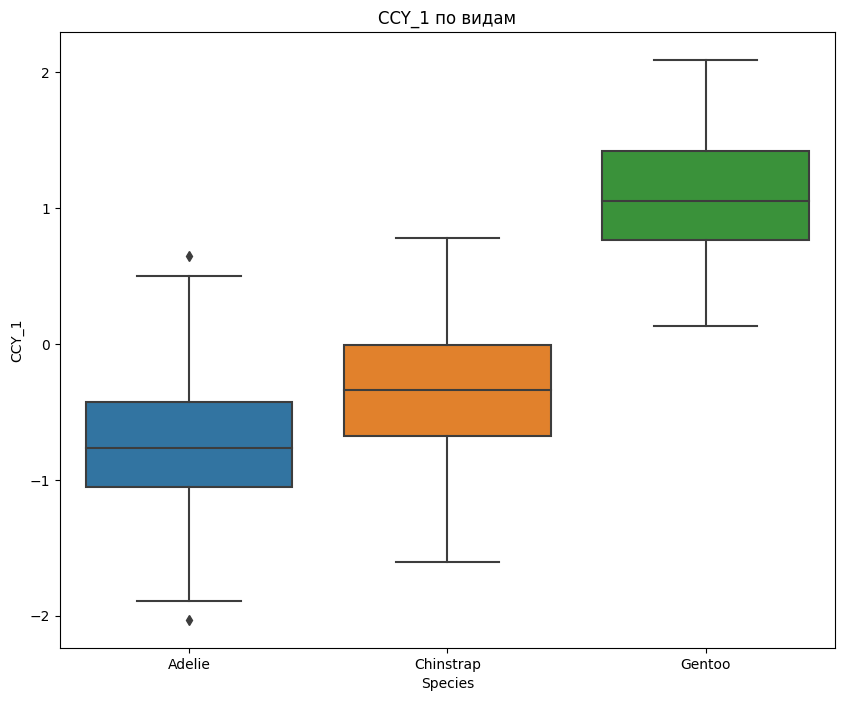

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Species', y='CCX_1', data=cc_res)
plt.title('CC_X1 по видам')
plt.figure(figsize=(10,8))
sns.boxplot(x='Species', y='CCY_1', data=cc_res)
plt.title('CCY_1 по видам')

Text(0.5, 1.0, 'Первая пара канонических переменных, corr = 0.79')

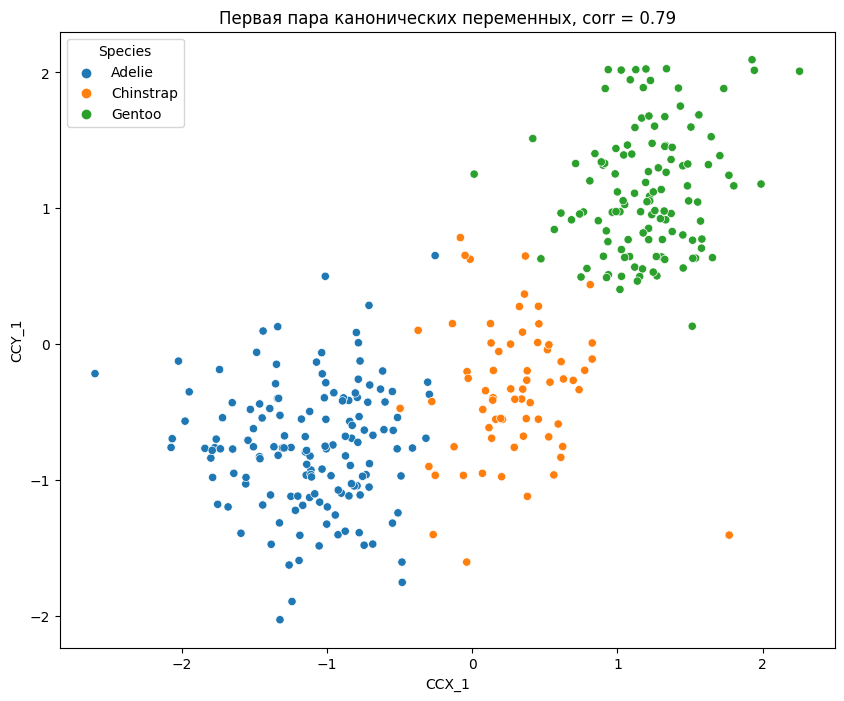

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1", y="CCY_1", hue="Species",data=cc_res)
plt.title('Первая пара канонических переменных, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

In [ ]:
ccX_df = pd.DataFrame({'CCX_1':X_c[:, 0], 'CCX_2':X_c[:, 1],
'Species':df.species.astype('category').cat.codes, 'Island':df.island.astype('category').cat.codes, 'sex':df.sex.astype('category').cat.codes,'bill_length':X_mc.bill_length_mm, 'bill_depth':X_mc.bill_depth_mm})

In [ ]:
ccX_df.head(10)

,CCX_1,CCX_2,Species,Island,sex,bill_length,bill_depth
0,-1.186252,-0.010367,0,2,1,-0.894695,0.779559
1,-0.709573,-0.456036,0,2,0,-0.821552,0.119404
2,-0.790732,-0.130809,0,2,0,-0.675264,0.424091
4,-1.718663,-0.073623,0,2,0,-1.333559,1.084246
5,-1.772295,0.736248,0,2,1,-0.858123,1.744400
6,-0.923497,-0.376806,0,2,0,-0.931267,0.322529
7,-1.463109,0.343932,0,2,1,-0.876409,1.236589
12,-0.548604,-0.185759,0,2,0,-0.528976,0.220967
13,-2.064978,0.879373,0,2,1,-0.986125,2.049087
14,-2.596714,0.355752,0,2,1,-1.717565,1.998306


In [ ]:
corr_X_df= ccX_df.corr(method='pearson')
corr_X_df.head()

,CCX_1,CCX_2,Species,Island,sex,bill_length,bill_depth
CCX_1,1.000000e+00,2.504132e-16,0.935057,-0.561781,0.025383,0.828437,-0.734650
CCX_2,2.504132e-16,1.000000e+00,-0.078719,0.228933,0.576790,0.560082,0.678447
Species,9.350575e-01,-7.871884e-02,1.000000,-0.622428,0.010964,0.730548,-0.740346
Island,-5.617810e-01,2.289327e-01,-0.622428,1.000000,-0.012435,-0.337179,0.568031
sex,2.538332e-02,5.767897e-01,0.010964,-0.012435,1.000000,0.344078,0.372673


<ipython-input-36-1917817c6983>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool ))


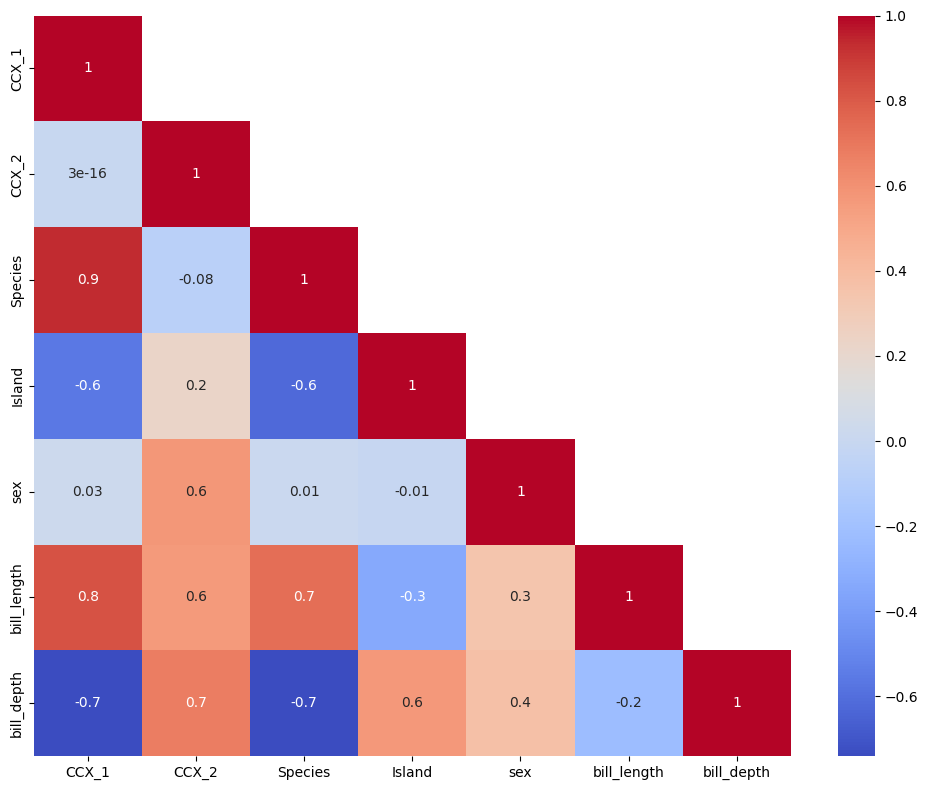

In [ ]:
plt.figure(figsize=(10,8))
X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool ))
sns.heatmap(X_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()
plt.savefig('Heatmap_Canonical_Correlates_from_X_and_data',
format='jpeg',
dpi=100)
plt.show()

Text(0.5, 1.0, 'Вторая пара канонических переменных, corr = 0.09')

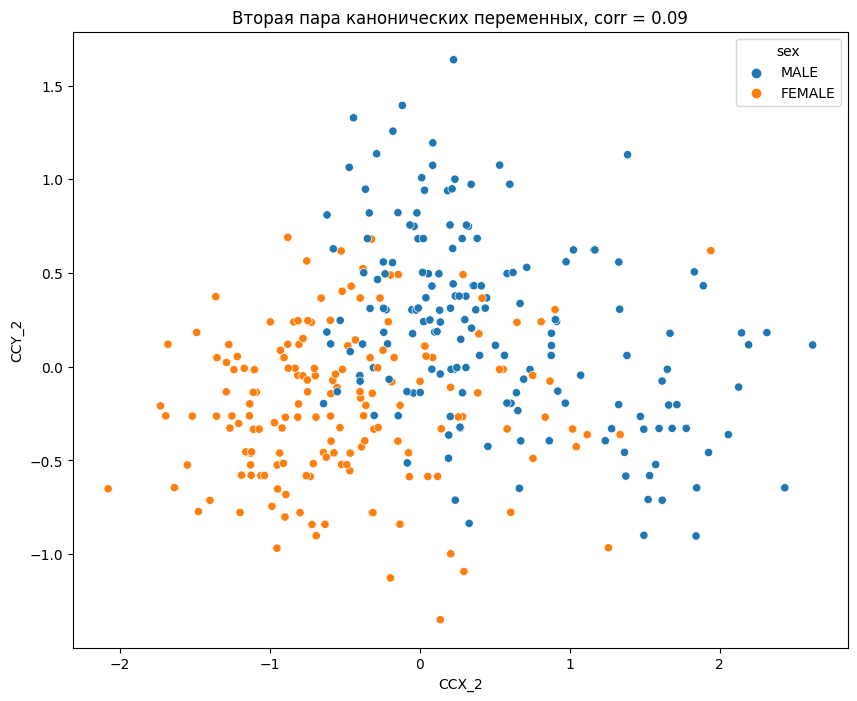

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CCX_2',
                y='CCY_2',
hue='sex', data=cc_res)
plt.title('Вторая пара канонических переменных, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])

In [ ]:
link2data = "https://datahub.io/machine-learning/iris/r/iris.csv"
df = pd.read_csv(link2data)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df =df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


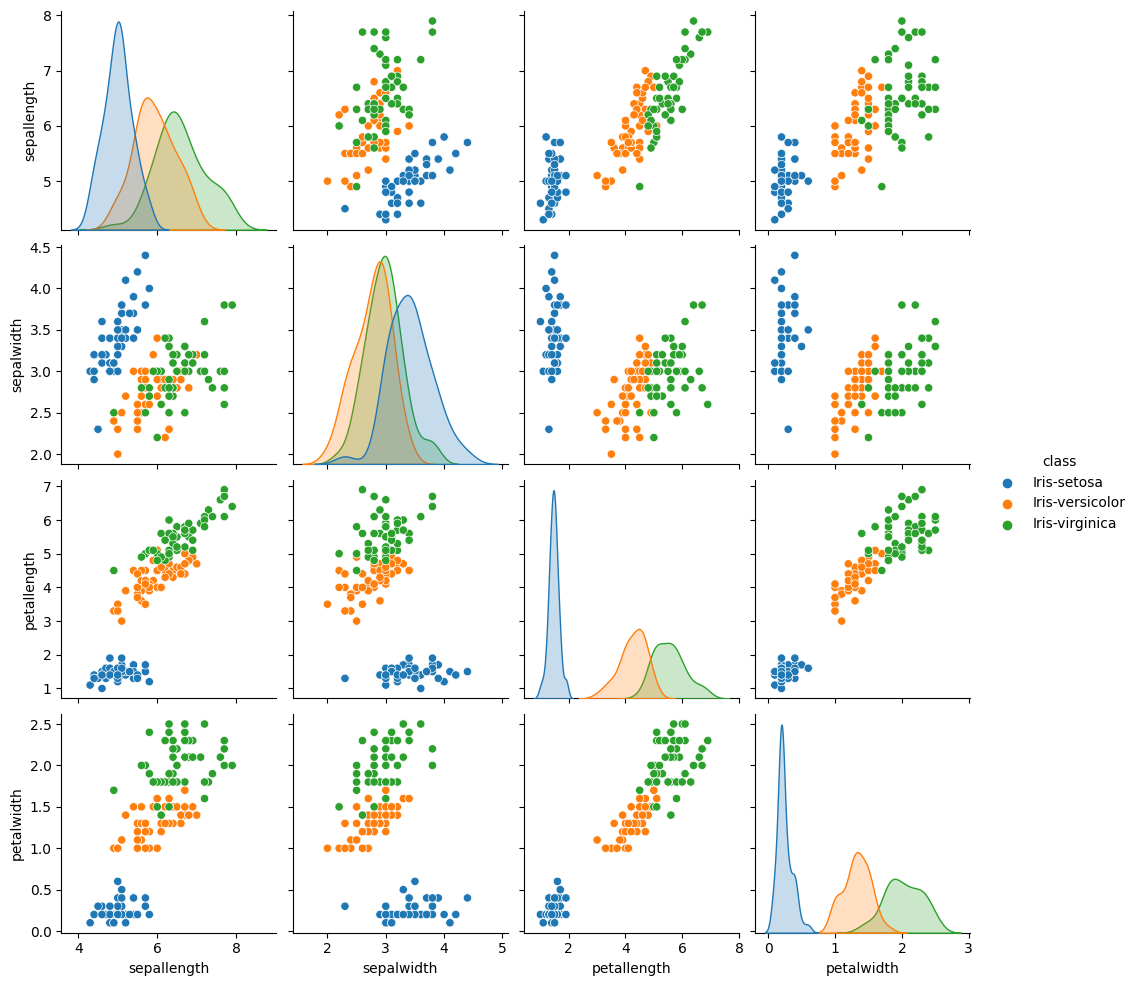

In [ ]:
sns.pairplot(data=df,hue='class')

In [ ]:
X = df[['sepallength','sepalwidth']]
X_mc = (X-X.mean())/(X.std())
X_mc.head()

,sepallength,sepalwidth
0,-0.897674,1.028611
1,-1.139200,-0.124540
2,-1.380727,0.336720
3,-1.501490,0.106090
4,-1.018437,1.259242


In [ ]:
Y = df[['petallength','petalwidth']]
Y_mc = (Y-Y.mean())/(Y.std())
Y_mc.head()

,petallength,petalwidth
0,-1.336794,-1.308593
1,-1.336794,-1.308593
2,-1.393470,-1.308593
3,-1.280118,-1.308593
4,-1.336794,-1.308593


In [ ]:
cca = CCA()
cca.fit(X_mc, Y_mc)
X_c, Y_c = cca.transform(X_mc, Y_mc)

In [ ]:
cc_res = pd.DataFrame({'CCX_1':X_c[:, 0],
                       'CCY_1':Y_c[:, 0],
                       'CCX_2':X_c[:, 1],
                       'CCY_2':Y_c[:, 1],
                       'class':df['class'].tolist()})
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,class
0,-1.225736,-0.819632,0.514067,-0.118129,Iris-setosa
1,-1.002295,-0.819632,-0.626843,-0.118129,Iris-setosa
2,-1.403475,-0.873015,-0.323468,-0.035336,Iris-setosa
3,-1.425601,-0.766248,-0.584433,-0.200921,Iris-setosa
4,-1.426326,-0.819632,0.665755,-0.118129,Iris-setosa


In [ ]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.94089718],
       [0.94089718, 1.        ]])

In [ ]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.       , 0.1310748],
       [0.1310748, 1.       ]])

Text(0.5, 1.0, 'CCY_1 по видам')

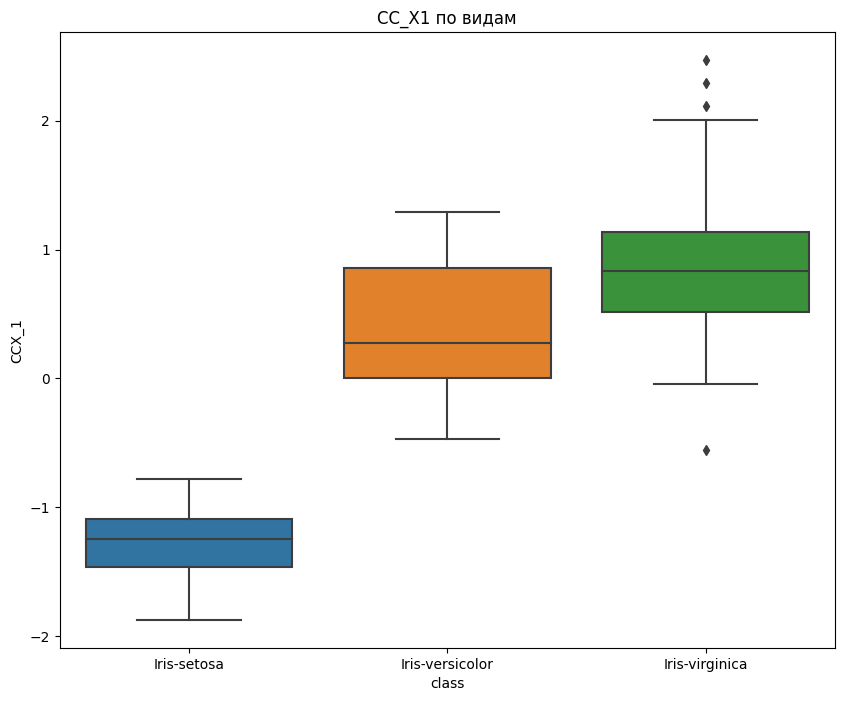

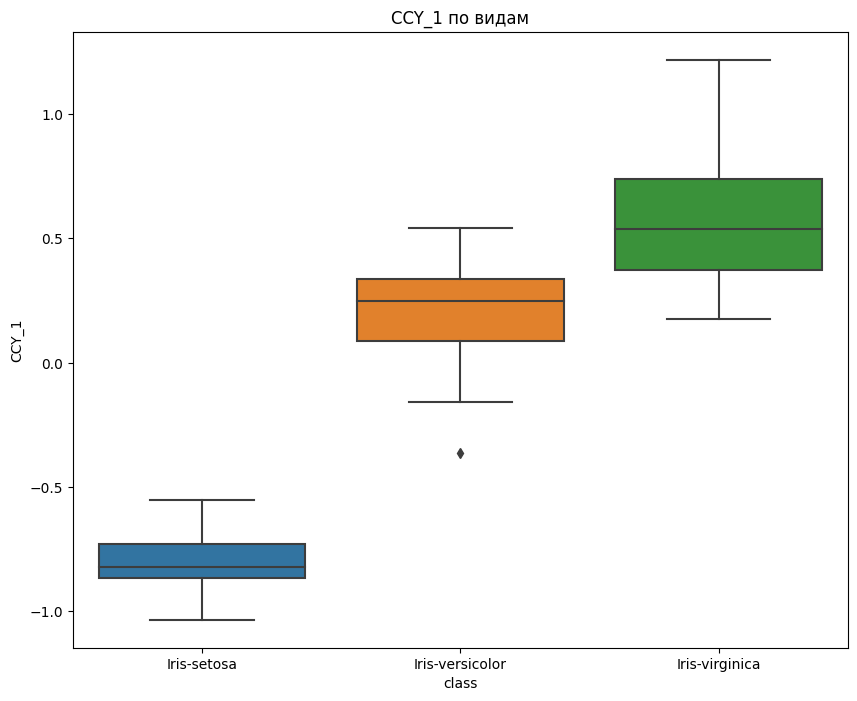

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='class', y='CCX_1', data=cc_res)
plt.title('CC_X1 по видам')
plt.figure(figsize=(10,8))
sns.boxplot(x='class', y='CCY_1', data=cc_res)
plt.title('CCY_1 по видам')

Text(0.5, 1.0, 'Первая пара канонических переменных, corr = 0.94')

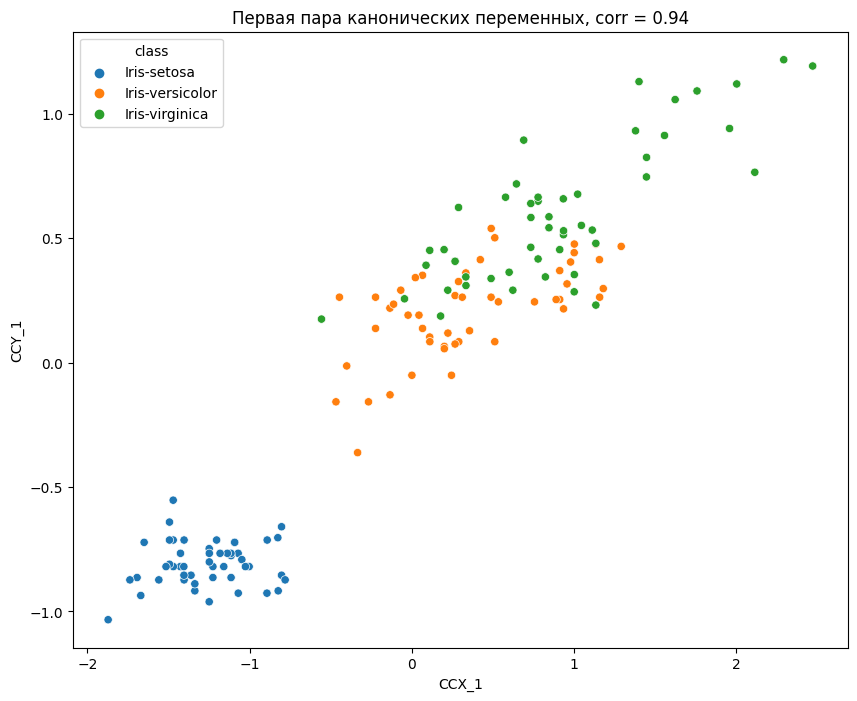

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1", y="CCY_1", hue="class",data=cc_res)
plt.title('Первая пара канонических переменных, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'Вторая пара канонических переменных, corr = 0.13')

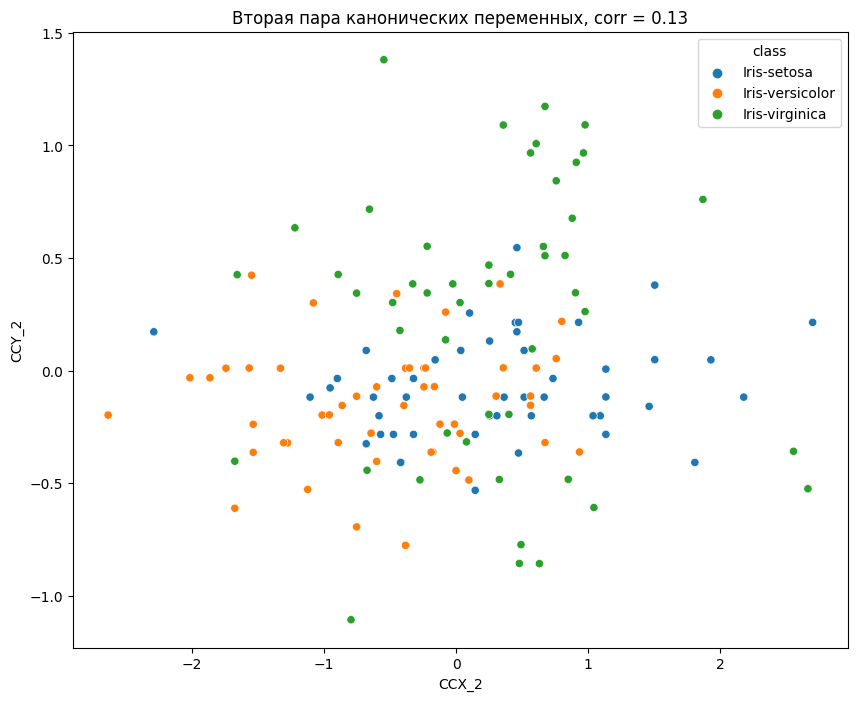

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CCX_2',
                y='CCY_2',
hue='class', data=cc_res)
plt.title('Вторая пара канонических переменных, corr = %.2f' %np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])